# Response to the first referee report:

## v1: 9 Apr 2021
### 1. Added kw to control the contour levels
### 2. Added a cmap to scatter plots of correlations

## 1) correlations between gray and color-ed ZP corrections 
## 2) G-r vs. g-i  diagram
## 3) u-r vs. Bp-Rp (and for g-r, r-i and r-z) diagrams



In [1]:
%matplotlib inline
import sys
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np
from astroML.plotting import hist
# for astroML installation see https://www.astroml.org/user_guide/installation.html

In [2]:
## automatically reload any modules read below that might have changed (e.g. plots)
%reload_ext autoreload
%autoreload 2
# importing ZI and KT tools: 
sys.path.append('/home/user/SDSS_SSC/Notebooks/')
import ZItools as zit
import KTtoolsv2 as ktt

In [3]:
# ZIdataDir = "/Users/ivezic/Work/Science/CalibrationV2/SDSS_SSC/Data"
ZIdataDir = '/home/user/SDSS_SSC/DataDir'
# new catalog from 2020
sdssNewCatIn = ZIdataDir + "/" + "stripe82calibStars_v4.2.dat"
readFormat = 'ascii'
# Gaia EDR3 with BP and RP data
GaiaEDR3CatBR = ZIdataDir + "/" + "Stripe82_GaiaEDR3_BPRP.dat"  

## read gray and colored zeropoints and then test for correlations

In [4]:
# read back colored zero point recalibration files 
icolor = 3
colors = ['ur', 'gr', 'ri', 'rz']
color = colors[icolor]

#zpcFilename = 'ZPcorrectionsRA_' + color + '_v4.2_final.dat'  
# zpcFilename = '../ZPcorrectionsRA_' + color + '_v3.2_final.dat' 
zpcFilename = ZIdataDir+'/ZPcorrectionsRA_' + color + '_v3.2_final.dat'
zpcRAgrid, zpcRA = np.loadtxt(zpcFilename)   

#zpcFilename = 'ZPcorrectionsDec_' + color + '_v4.2_final.dat'  
# zpcFilename = '../ZPcorrectionsDec_' + color + '_v3.2_final.dat' 
zpcFilename = ZIdataDir+'/ZPcorrectionsDec_' + color + '_v3.2_final.dat'
zpcDecgrid, zpcDec = np.loadtxt(zpcFilename)

print('color:', color, 'mean RA/Dec:', np.mean(zpcRA), np.mean(zpcDec)) 
print('color:', color, 'std RA/Dec:', np.std(zpcRA), np.std(zpcDec)) 

color: rz mean RA/Dec: -0.012363568101610158 -0.009563473554757897
color: rz std RA/Dec: 0.00803460000000006 0.0029990170331814004


In [5]:
# read back gray zero point recalibration files 
zpRAgrid, zpRA = np.loadtxt(ZIdataDir + "/" + 'ZPcorrectionsRA_v4.1_final.dat')  
zpDecgrid, zpDec = np.loadtxt(ZIdataDir + "/" + 'ZPcorrectionsDec_v4.1_final.dat')  
print('mean:', np.mean(zpRA), np.mean(zpDec))
print('sttd:', np.std(zpRA), np.std(zpDec))

mean: -0.00027887453671866753 -0.00015545930207332712
sttd: 0.0034314293508158284 0.006397229710591839


In [6]:
# Dec correction  
zpDecInterp = np.interp(zpcDecgrid, zpDecgrid, zpDec)
# RA correction 
zpRAInterp = np.interp(zpcRAgrid, zpRAgrid, zpRA)
print('interp mean RA/Dec:', np.mean(zpRAInterp), np.mean(zpDecInterp)) 
print('interp std RA/Dec:', np.std(zpRAInterp), np.std(zpDecInterp)) 

interp mean RA/Dec: 6.590578772415805e-05 -0.0001384677653147936
interp std RA/Dec: 0.0017093894273917385 0.006367517244685702


In [7]:
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] =  18
mpl.rcParams['lines.linewidth'] =  3
mpl.rcParams['lines.markersize'] =  10
mpl.rcParams['xtick.labelsize'] =  14
mpl.rcParams['ytick.labelsize'] =  14

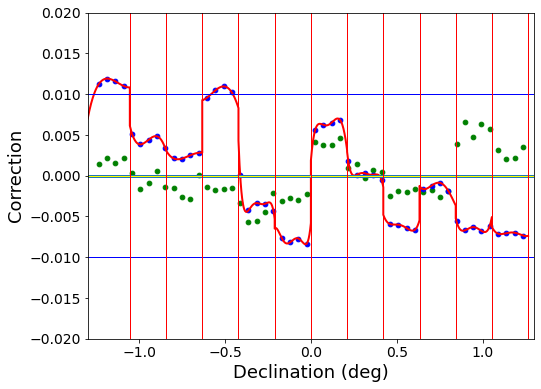

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(zpcDecgrid, zpcDec-np.mean(zpcDec), s=22.1, c='green')
ax.scatter(zpcDecgrid, -zpDecInterp, s=22.1, c='blue')
ax.plot(zpDecgrid, -zpDec, c='red', lw=2) 
ax.plot([-2, 2], [0,0])
ax.set_xlim(-1.3,1.3)
ax.set_ylim(-0.02,0.02)
ax.set_xlabel('Declination (deg)')
ax.set_ylabel('Correction')
xL = np.linspace(-100,100)
ax.plot(xL, 0*xL+0.00, c='yellow', lw=1)
ax.plot(xL, 0*xL+0.01, c='b', lw=1)
ax.plot(xL, 0*xL-0.01, c='b', lw=1)
for i in range(0,12):
    decCol = -1.2655 + (i+1)*0.2109
    ax.plot(0*xL+decCol, xL, c='red', lw=1)

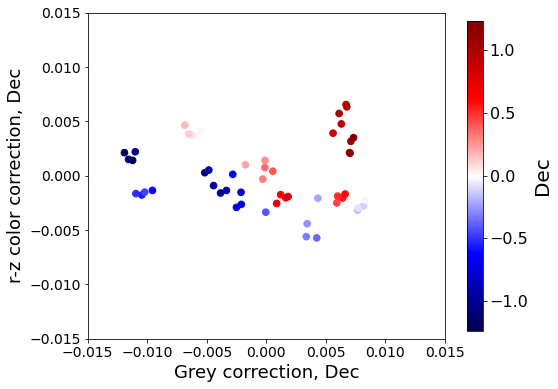

In [9]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
# ax.scatter(zpDecInterp, zpcDec-np.mean(zpcDec), s=22.1, c='blue')
sp = ax.scatter(zpDecInterp, zpcDec-np.mean(zpcDec), s=44.2, c=zpcDecgrid,cmap='seismic')
cbar = fig.colorbar(sp, spacing='proportional',shrink=0.95, ax=ax)
cbar.set_label(label='Dec',size=20)
cbar_tix_font = 16 # Adjust as appropriate.
cbar.ax.tick_params(labelsize=cbar_tix_font)
ax.set_xlim(-0.015, 0.015)
ax.set_ylim(-0.015, 0.015)
ax.set_xlabel('Grey correction, Dec')
ax.set_ylabel('r-z color correction, Dec')
plt.savefig('correlation_rz_Dec.png')

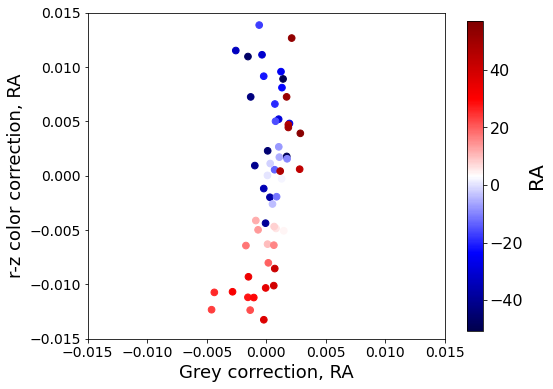

In [10]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
# ax.scatter(zpRAInterp, zpcRA-np.mean(zpcRA), s=22.1, c='blue')
sp = ax.scatter(zpRAInterp, zpcRA-np.mean(zpcRA), s=44.2, c=zpcRAgrid,cmap='seismic')
cbar = fig.colorbar(sp, spacing='proportional',shrink=0.95, ax=ax)
cbar.set_label(label='RA',size=20)
cbar_tix_font = 16 # Adjust as appropriate.
cbar.ax.tick_params(labelsize=cbar_tix_font)
ax.set_xlim(-0.015, 0.015) 
ax.set_ylim(-0.015, 0.015)
ax.set_xlabel('Grey correction, RA')
ax.set_ylabel('r-z color correction, RA')
plt.savefig('correlation_rz_RA.png')

## read v4.2, match to Gaia EDR3 and plot 
## G vs. g-i  CMD  and u-r vs. Bp-Rp (and for g-r, r-i and r-z)

In [11]:
 # both new and old files use identical data structure
colnamesSDSS = ['calib_fla', 'ra', 'dec', 'raRMS', 'decRMS', 'nEpochs', 'AR_val', 
                'u_Nobs', 'u_mMed', 'u_mMean', 'u_mErr', 'u_rms_scatt', 'u_chi2',
                'g_Nobs', 'g_mMed', 'g_mMean', 'g_mErr', 'g_rms_scatt', 'g_chi2',
                'r_Nobs', 'r_mMed', 'r_mMean', 'r_mErr', 'r_rms_scatt', 'r_chi2',
                'i_Nobs', 'i_mMed', 'i_mMean', 'i_mErr', 'i_rms_scatt', 'i_chi2',
                'z_Nobs', 'z_mMed', 'z_mMean', 'z_mErr', 'z_rms_scatt', 'z_chi2']
sdssAll = Table.read(sdssNewCatIn, format=readFormat, names=colnamesSDSS)
np.size(sdssAll)

991472

In [12]:
sdss = sdssAll[sdssAll['ra']<1]
sdss = zit.selectCatalog(sdssAll, sdss, aux="")

starting with 991472
after Nobs cuts: 991472
after chi2 cuts: 991472
after r_mErr cut: 991437


In [13]:
colnamesGaia = ['ra', 'dec', 'nObs', 'Gmag', 'flux', 'fluxErr', 'pmra', 'pmdec']
colnamesGaia = colnamesGaia + ['BPmag', 'BPeI', 'RPmag', 'RPeI', 'BRef']
gaia = Table.read(GaiaEDR3CatBR, format='ascii', names=colnamesGaia)
gaia['raG'] = gaia['ra']
gaia['decG'] = gaia['dec']    
gaia['GmagErr'] = gaia['fluxErr'] / gaia['flux'] 
gaia['BR'] = gaia['BPmag'] - gaia['RPmag'] 
gaia['GBP'] = gaia['Gmag'] - gaia['BPmag']
gaia['GRP'] = gaia['Gmag'] - gaia['RPmag']

In [14]:
sdss_coords = SkyCoord(ra = sdss['ra']*u.degree, dec= sdss['dec']*u.degree) 
gaia_coords = SkyCoord(ra = gaia['raG']*u.degree, dec= gaia['decG']*u.degree) 

# this is matching gaia to sdss, so that indices are into sdss catalog
# makes sense in this case since the sdss catalog is bigger than gaia
idxG, d2dG, d3dG = gaia_coords.match_to_catalog_sky(sdss_coords)  

# object separation is an object with units, 
# I add that as a column so that one can 
# select based on separation to the nearest matching object
gaia_sdss = hstack([gaia, sdss[idxG]], table_names = ['gaia', 'sdss'])
gaia_sdss['sepSG_2d_arcsec'] = d2dG.arcsec

In [15]:
### code for generating new quantities, such as dra, ddec, colors, differences in mags, etc
def derivedColumns(matches):
    ra = matches['ra_sdss'] 
    matches['ra'] = ra
    matches['raW'] = np.where(ra > 180, ra-360, ra) 
    matches['dec'] = matches['dec_sdss']
    matches['u'] = matches['u_mMed']
    matches['g'] = matches['g_mMed']
    matches['r'] = matches['r_mMed']
    matches['i'] = matches['i_mMed']
    matches['z'] = matches['z_mMed']
    matches['ug'] = matches['u_mMed'] - matches['g_mMed']
    matches['gr'] = matches['g_mMed'] - matches['r_mMed']
    matches['ri'] = matches['r_mMed'] - matches['i_mMed']
    matches['gi'] = matches['g_mMed'] - matches['i_mMed']
    # Gaia 
    matches['draGold'] = -3600*(matches['ra'] - matches['raG']) 
    matches['draGnew'] = -3600*(matches['ra'] - matches['raG']) 
    matches['ddecGold'] = -3600*(matches['dec'] - matches['decG']) 
    matches['ddecGnew'] = -3600*(matches['dec'] - matches['decG']) 
    # photometric
    matches['gGr'] = matches['Gmag'] - matches['r_mMed']
    matches['gGr_new'] = matches['Gmag'] - matches['r_mMed']
    matches['gRPr_new'] = matches['RPmag'] - matches['r_mMed']
    return

In [16]:
derivedColumns(gaia_sdss) 

In [17]:
## first limit astrometric distance and 
## require at least 4 epochs as in the old catalog
MAX_DISTANCE_ARCSEC = 0.5
m1 = gaia_sdss[(gaia_sdss['sepSG_2d_arcsec'] < MAX_DISTANCE_ARCSEC)]
a1 = m1['g_Nobs']
a2 = m1['r_Nobs']
a3 = m1['i_Nobs']
mOK = m1[(a1>3)&(a2>3)&(a3>3)]
print(len(gaia_sdss))
print(len(m1))
print(len(mOK))

2526361
915606
915606


In [18]:
################################
# THIS DOES THE 2D HISTO, in Black & White
# CHANGING ALL LINES TO BLACK, WITH GREYS CMAP
def plotdelMagBWreferee(d, kw):
 
    print('medianAll:', np.median(d[kw['Ystr']]), 'std.dev.All:', sigG(d[kw['Ystr']]))
    print('N=', np.size(d[kw['Ystr']]), 'min=', np.min(d[kw['Ystr']]), 'max=', np.max(d[kw['Ystr']]))

    # get binned medians and std devs
    # get med, sig, as well as x-binning
    xBinM, nPtsM, medianBinM, sigGbinM = fitMedians(d[kw['Xstr']], \
                                         d[kw['Ystr']], kw['XminB'], kw['XmaxB'], kw['nBinX'], 1)
    # get x-binning
    xMin,xMax,nBinX = kw['Xmin'], kw['Xmax'], kw['nBinX']
    # xEdge = np.linspace(yMin, yMax, (nBinY+1))    
    # get y-binning
    yMin,yMax,nBinY = kw['Ymin'], kw['Ymax'], kw['nBinY']
    # form the x,y edges vectors for 2d histo
    xedges = np.linspace(xMin,xMax,nBinX+1,endpoint=False,dtype=float)
    yedges = np.linspace(yMin,yMax,nBinY+1,endpoint=False,dtype=float)

    # create the 2D histo
    xvect,yvect = d[kw['Xstr']], d[kw['Ystr']]
    Histo2D, xedges, yedges = np.histogram2d(xvect,yvect, bins=(xedges, yedges))
    Histo2D = np.log(Histo2D.T)
    
    # plotting
    # get the colormap from kw
    cmap = kw['cmap']
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.15,  
        # the right side of the subplots of the figure
        right=0.97,
        # the bottom of the subplots of the figure
        bottom=0.15,
        # the top of the subplots of the figure
        top=0.98,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.3,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.3)   

    # ax.scatter(d[kw['Xstr']], d[kw['Ystr']], s=kw['symbSize'], c='black') 
    X, Y = np.meshgrid(xedges, yedges)
    cs = ax.pcolormesh(X,Y, Histo2D, cmap='Greys')
    # cs = ax.pcolormesh(X,Y, Histo2D, cmap=cmap)
    ## Rearrange the plotting order in order to make the lines stand out
    #
    rmsBin = np.sqrt(nPtsM) / np.sqrt(np.pi/2) * sigGbinM
    rmsP = medianBinM + rmsBin
    rmsM = medianBinM - rmsBin
    ax.plot(xBinM, rmsP, c='black', linewidth=2, linestyle='dashdot')
    ax.plot(xBinM, rmsM, c='black', linewidth=2, linestyle='dashdot')
    # 
    if (kw['offset'] >= 0):
        offsetColor0 = 'black'
        offsetColor1 = 'black'
        xL = np.linspace(kw['XminBin'], kw['XmaxBin'])
        ax.plot(xL, 0*xL, '-', c=offsetColor0, linewidth=3)
        ax.plot(xL, 0*xL+kw['offset'], '--', c=offsetColor1, linewidth=3)
        ax.plot(xL, 0*xL-kw['offset'], '--', c=offsetColor1, linewidth=3)
    if (0):
        ax.scatter(xBinM, medianBinM, s=30.0, c='black', alpha=0.8)
        ax.scatter(xBinM, medianBinM, s=15.0, c='black', alpha=0.3)
    #
    TwoSigP = medianBinM + kw['Nsigma']*sigGbinM
    TwoSigM = medianBinM - kw['Nsigma']*sigGbinM 
    #ax.plot(xBinM, TwoSigP, c='silver', linewidth=3)
    #ax.plot(xBinM, TwoSigM, c='silver', linewidth=3)
    #
    ## a horrible hack to produce the plot for the referee 
    if ((kw['offset'] > -3)&(kw['offset'] < -1)):
        import ZItools as zit
        polyOrder = 6
        print('plotdelMagBWreferee: fitting poly order', polyOrder)
        data = np.array([xBinM, medianBinM, sigGbinM])
        Ndata = xBinM.size
        # get best-fit parameters  
        thetaCloc = zit.best_theta(data,polyOrder)
        # generate best fit lines on a fine grid 
        xfit = np.linspace(kw['XminBfit'], kw['XmaxBfit'], 1000)
        yfit = zit.polynomial_fit(thetaCloc, xfit) 
        ax.plot(xBinM, medianBinM, c='blue', linewidth=3, linestyle='dashed')
        ax.plot(xfit, yfit, c='red', linewidth=1, linestyle='solid')

    labelFontSize = 32
    ticksFontSize = 28
    ax.set_xlabel(kw['Xlabel'], fontsize=labelFontSize)
    ax.set_ylabel(kw['Ylabel'], fontsize=labelFontSize)
    ax.set_xlim(kw['Xmin'], kw['Xmax'])
    ax.set_ylim(kw['Ymin'], kw['Ymax'])
    plt.xticks(fontsize=ticksFontSize)
    plt.yticks(fontsize=ticksFontSize)
    plt.savefig(kw['plotName'], dpi=600)
    print('plotdelMagBWreferee: saved plot as:', kw['plotName']) 
    plt.show()
    return xBinM, medianBinM, xfit, yfit, thetaCloc

# robust standard deviation
def sigG(arr):
    return 0.741*(np.quantile(arr, 0.75)-np.quantile(arr, 0.25))

################################
# given vectors x and y, fit medians in bins from xMin to xMax, with Nbin steps,
# and return xBin, medianBin, medianErrBin 
def fitMedians(x, y, xMin, xMax, Nbin, verbose=1): 

    # first generate bins
    xEdge = np.linspace(xMin, xMax, (Nbin+1)) 
    xBin = np.linspace(0, 1, Nbin)
    nPts = 0*np.linspace(0, 1, Nbin)
    medianBin = 0*np.linspace(0, 1, Nbin)
    sigGbin = -1+0*np.linspace(0, 1, Nbin) 
    for i in range(0, Nbin): 
        xBin[i] = 0.5*(xEdge[i]+xEdge[i+1]) 
        yAux = y[(x>xEdge[i])&(x<=xEdge[i+1])]
        if (yAux.size > 0):
            nPts[i] = yAux.size
            medianBin[i] = np.median(yAux)
            # robust estimate of standard deviation: 0.741*(q75-q25)
            sigmaG = 0.741*(np.percentile(yAux,75)-np.percentile(yAux,25))
            # uncertainty of the median: sqrt(pi/2)*st.dev/sqrt(N)
            sigGbin[i] = np.sqrt(np.pi/2)*sigmaG/np.sqrt(nPts[i])
        else:
            nPts[i] = 0
            medianBin[i] = 0
            sigGbin[i] = 0
        
    if (verbose):
        print('median:', np.median(medianBin[nPts>0]), 'std.dev:', np.std(medianBin[nPts>0]))

    return xBin, nPts, medianBin, sigGbin

def plotGmag2Ddiagrams(d, plotFit=False):
    ### plots 
    plotNameRoot = 'GrVSgi-poly'
    plotName = plotNameRoot + '.png'    
    kw = {"Xstr":'gi', "Xmin":0.0, "Xmax":3.5, "Xlabel":'SDSS g-i', \
          "Ystr":'gGr_new', "Ymin":-1.25, "Ymax":0.25, "Ylabel":'Gaia Gmag - SDSS r', \
          "XminB":0.1, "XmaxB":3.4, "XminBfit":0.05, "XmaxBfit":3.45, "nBin":90, \
          "plotName":plotName, "Nsigma":3, "offset":0.0, "symbSize":0.05}
    kw["nBinX"] = 90
    kw["nBinY"] = 80
    kw["cmap"] = 'cet_CET_L12'
    if (plotFit):
        kw["offset"] = -2
    xBin, medianBin, xfit, yfit, theta = plotdelMagBWreferee(d, kw)
    kw["XminBin"] = kw["XminB"] 
    kw["XmaxBin"] = kw["XmaxB"] 
    kw["plotName"] = 'KT' + kw["plotName"] 
    kw["contur"] = True
    kw['cbar_tix'] = [1,2,3]
    ktt.plotdelMag2logDC_KT(d, kw)
    return xBin, medianBin, xfit, yfit, theta

medianAll: -0.010918907165526903 std.dev.All: 0.21805257784652726
N= 915606 min= -4.998144592285158 max= 3.3942694854736324
median: -0.026706047058105753 std.dev: 0.3174216285490457


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


plotdelMagBWreferee: fitting poly order 6
plotdelMagBWreferee: saved plot as: GrVSgi-poly.png


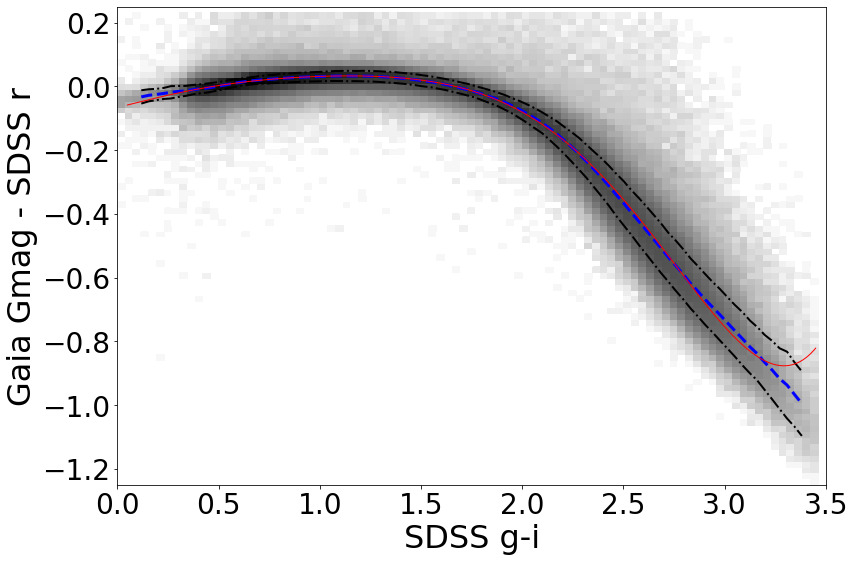

medianAll: -0.010918907165526903 std.dev.All: 0.21805257784652726
N= 915606 min= -4.998144592285158 max= 3.3942694854736324
median: -0.026706047058105753 std.dev: 0.3174216285490457
saved plot as: KTGrVSgi-poly.png


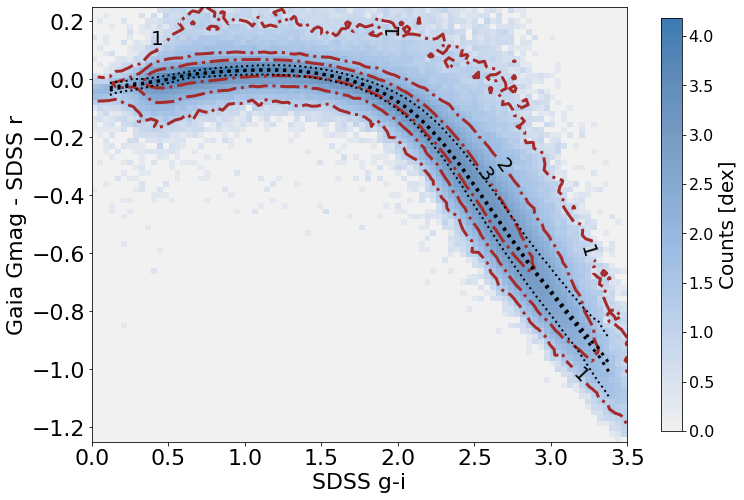

-0.00026640849145164597 0.0054301014852515764


In [19]:
xBin, medianBin, xfit, yfit, theta = plotGmag2Ddiagrams(mOK, plotFit=True)
resid = medianBin - np.interp(xBin, xfit, yfit)
residOK = resid[(xBin>0.4)&(xBin<3.0)]
residOK2 = residOK[np.abs(residOK)<0.3]
print(np.median(residOK2), np.std(residOK2))

In [20]:
mOKc = mOK[(mOK['Gmag']<19.0)&(mOK['g']>14)&(mOK['g']<22)]

In [21]:
df = mOKc
df['ur'] = df['u'] - df['r'] 
df['gr'] = df['g'] - df['r'] 
df['ri'] = df['r'] - df['i'] 
df['rz'] = df['r'] - df['z'] 

medianAll: 2.5380000000000003 std.dev.All: 1.4079000000000015
N= 370146 min= -10018.34 max= 10003.154


/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


median: 3.9064999999999994 std.dev: 1.1734323259087651
saved plot as: ur-BR.png


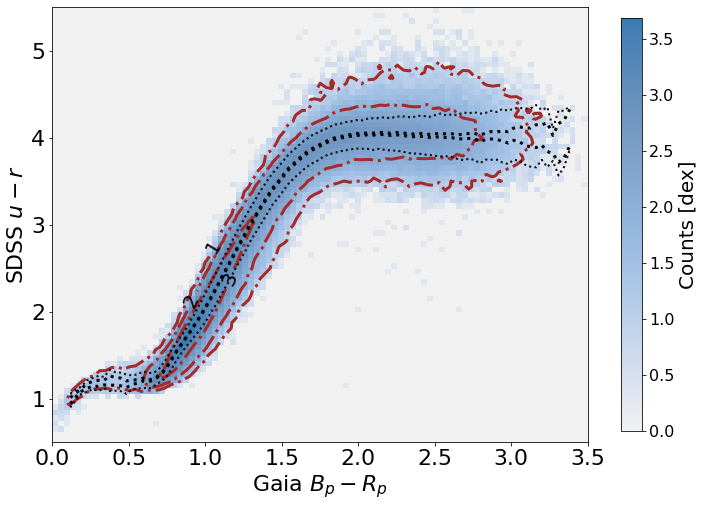

In [22]:
kw = {"Xstr":'BR', "Xmin":0.0, "Xmax":3.5, "Xlabel":'Gaia $B_p-R_p$', \
      "nBinX":90, "nBinY":80, "cmap":'cet_CET_L12', "contur":True, \
      "XminBin":0.1, "XmaxBin":3.4, "XminBfit":0.05, "XmaxBfit":3.45, "nBin":90, \
      "Nsigma":3, "offset":-2.0, "symbSize":0.05}

# u-r 
kw["Ystr"] = 'ur'
kw["Ylabel"] = 'SDSS $u-r$' 
kw["plotName"] = 'ur-BR.png' 
kw["Ymin"] = 0.5
kw["Ymax"] = 5.5 
kw['cbar_tix'] = [1,2,3]
ktt.plotdelMag2logDC_KT(df, kw) 

medianAll: 0.7280000000000015 std.dev.All: 0.5475990000000006
N= 370146 min= -4.510000000000002 max= 2.115000000000002


/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


median: 1.3145000000000007 std.dev: 0.5621472254821543
saved plot as: gr-BR.png


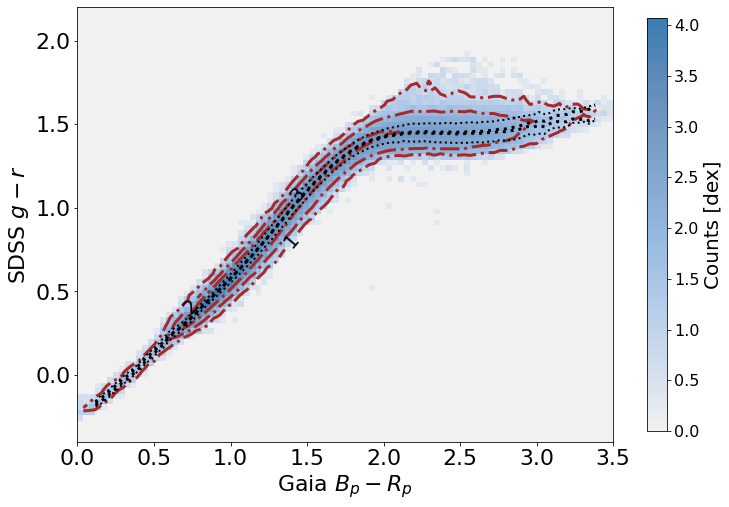

In [23]:
# g-r 
kw["Ystr"] = 'gr'
kw["Ylabel"] = 'SDSS $g-r$' 
kw["plotName"] = 'gr-BR.png' 
kw["Ymin"] = -0.4
kw["Ymax"] = 2.2
kw['cbar_tix'] = [1,2,3]
ktt.plotdelMag2logDC_KT(df, kw) 

medianAll: 0.277000000000001 std.dev.All: 0.24453000000000005
N= 370146 min= -4.822999999999997 max= 10018.426


/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


median: 0.5714999999999995 std.dev: 0.5921536437258303
saved plot as: ri-BR.png


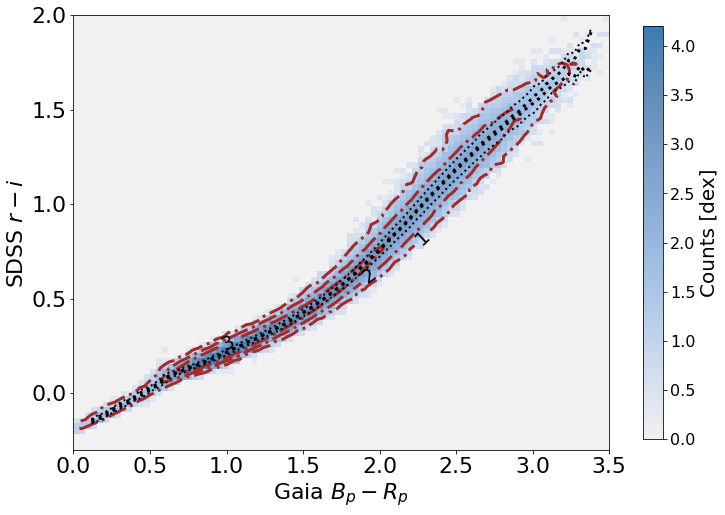

In [24]:
# r-i 
kw["Ystr"] = 'ri'
kw["Ylabel"] = 'SDSS $r-i$' 
kw["plotName"] = 'ri-BR.png' 
kw["Ymin"] = -0.3
kw["Ymax"] = 2.0
kw['cbar_tix'] = [1,2,3]
ktt.plotdelMag2logDC_KT(df, kw) 

medianAll: 0.42400000000000126 std.dev.All: 0.40532700000000044
N= 370146 min= -1.471 max= 10017.59


/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


median: 0.8969999999999985 std.dev: 0.9218050324107468
saved plot as: rz-BR.png


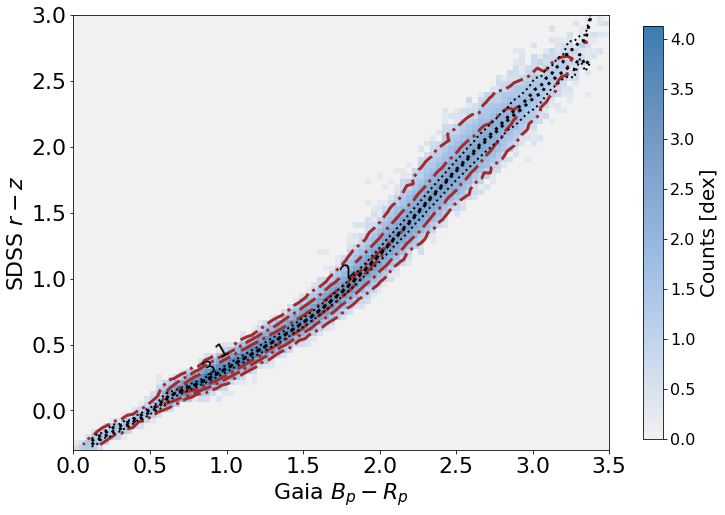

In [25]:
# r-z 
kw["Ystr"] = 'rz'
kw["Ylabel"] = 'SDSS $r-z$' 
kw["plotName"] = 'rz-BR.png' 
kw["Ymin"] = -0.3
kw["Ymax"] = 3.0
kw['cbar_tix'] = [1,2,3]
ktt.plotdelMag2logDC_KT(df, kw) 